In [1]:
import pandas as pd

In [6]:
data=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv")

In [8]:
data.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
374,15793890,Female,37,80000,0
277,15764604,Male,49,88000,1
253,15584320,Female,37,146000,1
388,15672330,Male,47,34000,1
236,15660541,Male,40,57000,0
287,15761950,Female,48,138000,1
296,15673539,Male,42,73000,1
185,15814816,Male,31,66000,0
347,15768151,Female,54,108000,1
371,15774744,Male,60,83000,1


In [9]:
data=data.iloc[:,2:]

In [10]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('Purchased',axis=1),data['Purchased'],test_size=0.3,random_state=0)

In [13]:
X_train.shape

(280, 2)

# StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [21]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [22]:
# np.round(X_train.describe(), 1)
import numpy as np

In [25]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [27]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect after scaling

In [29]:
import matplotlib.pyplot as plt

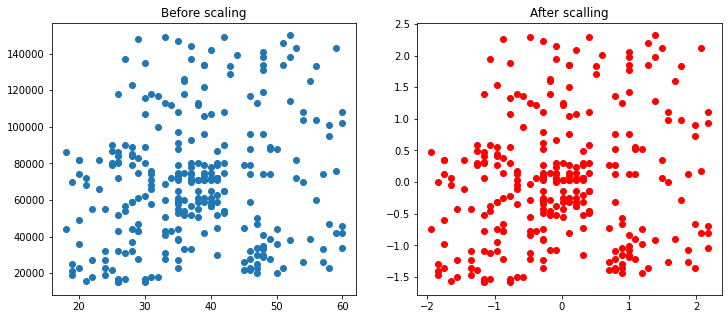

In [43]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before scaling")


ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scalling")
plt.show()


In [44]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# # before scaling
# ax1.set_title('Before Scaling')
# sns.kdeplot(X_train['Age'], ax=ax1)
# sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# # after scaling
# ax2.set_title('After Standard Scaling')
# sns.kdeplot(X_train_scaled['Age'], ax=ax2)
# sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
# plt.show()



In [46]:
import seaborn as sns

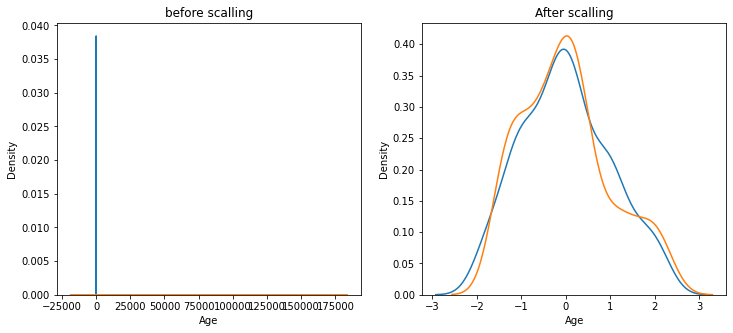

In [50]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax1.set_title("before scalling")



sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("After scalling")
plt.show()


# why scaling important

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr_model=LogisticRegression()

In [53]:
lr_scalled_model=LogisticRegression()

In [54]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
lr_scalled_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [56]:
lr_model_pred=lr_model.predict(X_test)

In [58]:
lr_scalled_model_pred=lr_scalled_model.predict(X_test_scaled)

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
print("THis is before scalling accuracy score :",accuracy_score(y_test,lr_model_pred))
print("This is after scalling accuracy score :",accuracy_score(y_test,lr_scalled_model_pred))

THis is before scalling accuracy score : 0.6583333333333333
This is after scalling accuracy score : 0.8666666666666667


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
D_model=DecisionTreeClassifier()

In [65]:
D_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
D_model_scalled=DecisionTreeClassifier()


In [67]:
D_model_scalled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [68]:
D_model_pred=D_model.predict(X_test)

In [69]:
D_model_scalled_pred=D_model_scalled.predict(X_test_scaled)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
print("This is DecisionTree before scalling :",accuracy_score(y_test,D_model_pred))

This is DecisionTree before scalling : 0.875


In [73]:
print("THis is DecisionTree after scalling :",accuracy_score(y_test,D_model_scalled_pred))

THis is DecisionTree after scalling : 0.875


# use of standardization which algo

1.k-means

2.gradient decent

3.PcA

4.k-nearest-neighbours

5.neural network